# 파이토치 모델구조

## 1. 신경망 (Neural Network) 구조 개요     

- 딥러닝을 위한 신경망은 다양한 layer(계층)으로 구성되어 있다.
- 이런 레이어는 파이토치의 API를 이용해서 간단하고 빠르게 구축 가능하다.
- torch.nn 패키지를 이용하면 다양한 딥러닝 모델을 만들어 학습이 가능.

## 2. 딥러닝 학습 개요

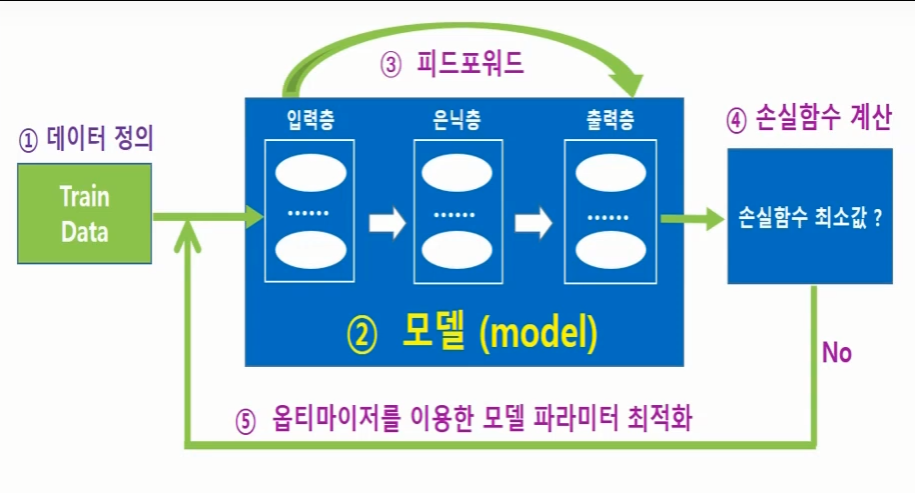
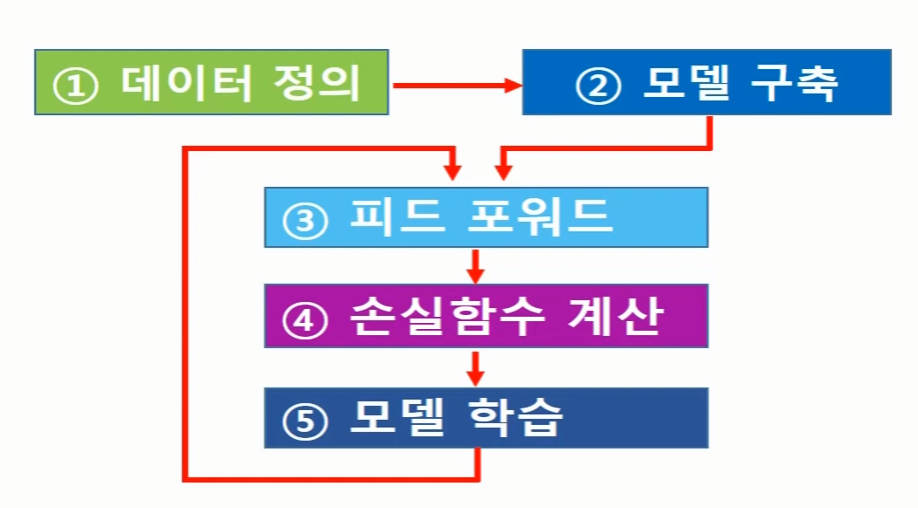
출처 : NeoWizard(pytorch강의)

1. 데이터 정의
2. 모델 구축
3. 피드포워드를 통해 손실함수 계산
4. 최적화 알고리즘(옵티마이저)를 이용해서 손실함수가 최소가 될 때까지 모델 파라미터(W,b)값을 찾아가는 과정 3~4 과정을 반복하며 딥러능 학습이 진행된다

## 3 파이토치 학습 절차

### 3.1 데이터 정의

In [6]:
import torch
x_train_ex = torch.Tensor([1, 2, 3, 4, 5, 6])
x_train = torch.Tensor([1, 2, 3, 4, 5, 6]).view(6, 1)
print(x_train_ex)
print(x_train)


tensor([1., 2., 3., 4., 5., 6.])
tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])


In [18]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train = torch.Tensor([1, 2, 3, 4, 5, 6]).view(6, 1)
y_train = torch.Tensor([3, 4 ,5 ,6 ,7 ,8]).view(6, 1)

dataset = TensorDataset(x_train,y_train) # 텐서 데이터셋 생성 (파이토치에서 제공하는 클래스)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True) # 데이터 로더 정의



### 3.2 신경망 모델 구축    
- 파이토치에서 신경망 모델은 nn.Module 을 상속받는 클래스를 생성하여 정의하는 것이 일반적이다.
- 클래스 __init__ 함수에서 신경망 모델을 구성하는 다양한 레이어들을 정의한다.
- forward 함수에서 신경망에 데이터를 어떻게 전달할지, 즉 피드포워드를 수행하고 결과값을 리턴한다.

In [19]:
from torch import nn
# 신경망 모델 클래스(class)
class MyNeuralNetwork(nn.Module):

    def __init__(self):  # 신경망 모델을 구성하는 레이어 정의
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    def forward(self, x): # 피드포워드를 수행하고 결과값을 리턴함.
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

model = MyNeuralNetwork() # 신경망 모델 인스턴스 생성

# 피드포워드 . 손실함수 계산 . 모델 파라미터 최적화

loss_function = nn.MSELoss() # 손실함수 정의

optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) # 옵티마이저 사용

nums_epoch = 2000

for epoch in range(nums_epoch+1):

    prediction = model(x_train) # model 에 데이터를 전달하면, model 클래스의 forward() 함수가 자동으로 호출된다.
    loss = loss_function(prediction, y_train) # 피드 포워드 계산 결과: 정답과의 오차를 계산한다. y_train은 정답값으로 지정해 놨었다.

    # 역전파하여 모델의 파라미터를 최적화시키는 과정 학습이 진행됨에 따라 파라미터 최적값 업데이트 하면서 계속
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if epoch % 100 == 0:
        loss_val = loss.item()
        print('epoch = ' , epoch, 'current loss = ' , loss_val)

### 3.3 간단한 예제

In [21]:
import torch
from torch import nn

x_train = torch.Tensor([1, 2, 3, 4, 5, 6]).view(6, 1)
y_train = torch.Tensor([3, 4 ,5 ,6 ,7 ,8]).view(6, 1)


class MyNeuralNetwork(nn.Module):

    def __init__(self):  # 신경망 모델을 구성하는 레이어 정의
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1,1) # 입력 데이터 1개, 출력 데이터 1개
        )
    def forward(self, x): # 피드포워드를 수행하고 결과값을 리턴함.
        logits = self.linear_relu_stack(x)
        return logits

model = MyNeuralNetwork() # 신경망 모델 인스턴스 생성

loss_function = nn.MSELoss() # 손실함수 정의

optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) # 옵티마이저 사용

nums_epoch = 2000

for epoch in range(nums_epoch+1):

    prediction = model(x_train) # model 에 데이터를 전달하면, model 클래스의 forward() 함수가 자동으로 호출된다.
    loss = loss_function(prediction, y_train) # 피드 포워드 계산 결과: 정답과의 오차를 계산한다. y_train은 정답값으로 지정해 놨었다.

    # 역전파하여 모델의 파라미터를 최적화시키는 과정 학습이 진행됨에 따라 파라미터 최적값 업데이트 하면서 계속
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if epoch % 100 == 0:
        loss_val = loss.item()
        print('epoch = ' , epoch, 'current loss = ' , loss_val)

epoch =  0 current loss =  27.19720458984375
epoch =  100 current loss =  0.17192183434963226
epoch =  200 current loss =  0.1219944953918457
epoch =  300 current loss =  0.11334902793169022
epoch =  400 current loss =  0.10536929219961166
epoch =  500 current loss =  0.09795111417770386
epoch =  600 current loss =  0.09105520695447922
epoch =  700 current loss =  0.08464468270540237
epoch =  800 current loss =  0.07868567854166031
epoch =  900 current loss =  0.0731460228562355
epoch =  1000 current loss =  0.06799650937318802
epoch =  1100 current loss =  0.0632094219326973
epoch =  1200 current loss =  0.05875952169299126
epoch =  1300 current loss =  0.05462275817990303
epoch =  1400 current loss =  0.050777386873960495
epoch =  1500 current loss =  0.04720258712768555
epoch =  1600 current loss =  0.04387950524687767
epoch =  1700 current loss =  0.04079027101397514
epoch =  1800 current loss =  0.03791877254843712
epoch =  1900 current loss =  0.035249222069978714
epoch =  2000 c

In [27]:
x_test = torch.Tensor([-3.1, 3.0, 1.2, -2.5]).view(4,1)

pred = model(x_test)
print(pred)

tensor([[-1.8112],
        [ 4.8766],
        [ 2.9031],
        [-1.1534]], grad_fn=<AddmmBackward0>)
